# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [325]:
import pandas as pd

reviews_sample = pd.read_csv('data/reviews_sample.csv')
reviews_sample

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [326]:
recipes_sample = pd.read_csv('data/recipes_sample.csv')
recipes_sample.set_index('id',inplace=True)
recipes_sample.drop(['contributor_id', 'n_steps'], axis = 1, inplace=True)
recipes_sample

,name,minutes,submitted,description,n_ingredients
id,,,,,
44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...
267661,zurie s holey rustic olive and cheddar bread,80,2007-11-25,this is based on a french recipe but i changed...,10.0
386977,zwetschgenkuchen bavarian plum cake,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
103312,zwiebelkuchen southwest german onion cake,75,2004-11-03,this is a traditional late summer early fall s...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [327]:
five_reviews = reviews_sample.sample(frac=0.05)
five_recipes = recipes_sample.sample(frac=0.05)

writer = pd.ExcelWriter('recipes.xlsx', engine='xlsxwriter')
five_reviews.to_excel (writer, sheet_name='Отзывы')
five_recipes.to_excel (writer, sheet_name='Рецепты')
writer.close()

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [328]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sh_2 = wb.sheets['Рецепты']
sh_2.range('G1').value = 'seconds_assign'
sec = recipes_sample['minutes'] * 60
sec = sec.to_list()
sh_2.range('G2:G1501').options(index=False, transpose=True).value = sec

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [329]:
sh_2.range('H1').value = 'seconds_formula'
s = sh_2.range('C2:C1501').get_address(row_absolute=False, column_absolute=False)
sh_2.range('H2:H1501').formula=f'={s}*60'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [330]:
sh_2.range('A1:H1').api.Font.Bold = True
range_address = 'A1:H30001'
sh_2.range(range_address).api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [331]:
column_range = sh_2.range('G2:G1501')
for cell in column_range:
    value = cell.value
    value = value / 60
    if value < 5:
        cell.color = (0, 255, 0)
    elif 5 <= value <= 10:
        cell.color = (255, 255, 0)
    else:
        cell.color = (255, 0, 0)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [332]:
sh = wb.sheets['Отзывы']
column_range_1 = sh.range("A1:A6336").get_address(include_sheetname=True)
column_range_2 = sh_2.range("A2:A1501").get_address(row_absolute=False, column_absolute=False)
sh_2.range('I1').value = 'n_reviews'

f = sh_2.range('A1').current_region.last_cell.row
sh_2.range('I2:I{}'.format(f)).formula = f'=COUNTIF({column_range_1}, {column_range_2})'

wb.save()
wb.close()

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [333]:
def validate():
    wb = xw.Book('recipes.xlsx')
    sh = wb.sheets['Отзывы']
    sh_2 = wb.sheets['Рецепты']
    recipe_range = sh.range("A2:A6336")
    rating_range = sh.range("F2:F6336")
    highlight_range = sh_2.range("A2:A1501")

    for i in range(len(recipe_range)):
        recipe = recipe_range[i].value
        rating = rating_range[i].value
        if (rating < 0 or rating > 5) or recipe not in highlight_range.value:
            sh.range(f"A{i+2}:G{i+2}").color = (255, 0, 0)
    wb.save()
    wb.close()
validate()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [334]:
import csv


with open('data/recipes_model.csv', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    data = list(reader)

wb = xw.Book()
wb.sheets[0].name = 'Модель'
sh_3 = wb.sheets['Модель']
sh_3.range('A1').value = data
wb.save('recipes_model.xlsx')
wb.close()


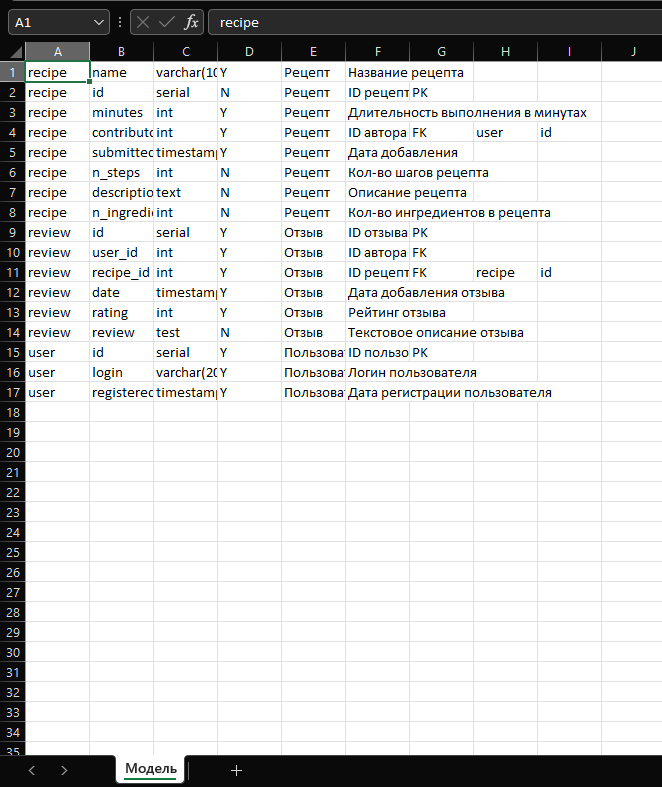

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [335]:
wb = xw.Book('recipes_model.xlsx')
sh_3 = wb.sheets['Модель']
formula = '=B2&" "&UPPER(C2)&" "&IFS(G2="PK", "PRIMARY KEY", G2="FK", "REFERENCES"&" "&H2&"("&I2&")", G2="","")&" "&IF(AND(D2="Y",NOT(G2="PK")),"NOT NULL","")'
sh_3.range('J2:J18').formula = formula

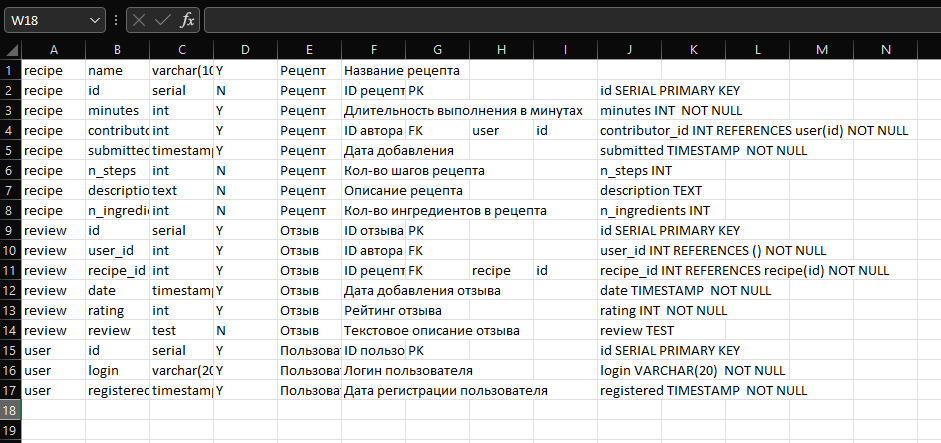

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [336]:
header_range = sh_3.range('A1').expand('right')
header_range.color = (0, 204, 255)
header_range.api.Font.Bold = True

sh_3.api.Cells.EntireColumn.AutoFit()

sh_3.range('A1').expand('right').api.AutoFilter(Field:=1)

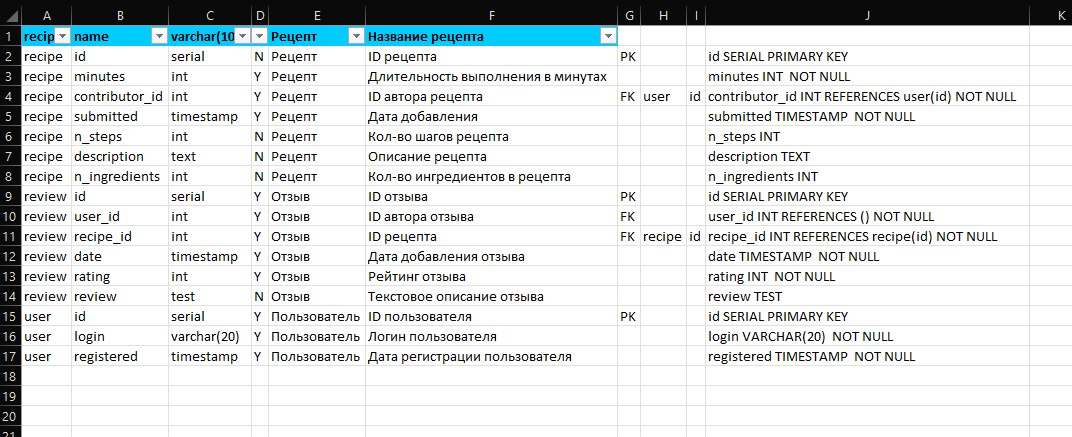

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [350]:
import pandas as pd

wb = xw.Book()
wb.sheets[0].name = 'Статистика'
sh_4 = wb.sheets['Статистика']
data = pd.read_csv('data/recipes_model.csv', delimiter='\t')

statistics = data.groupby('recipe').size()
sh_4.range('A1').value = statistics.to_frame()

chart = sh_4.charts.add()
chart.set_source_data(sh_4.range('A1').expand())
chart.chart_type = 'column_clustered'
chart.name = 'Количество атрибутов'

chart.top = sh_4.range('E2').top
chart.left = sh_4.range('E2').left

wb.save('recipes_statistics.xlsx')
wb.close()

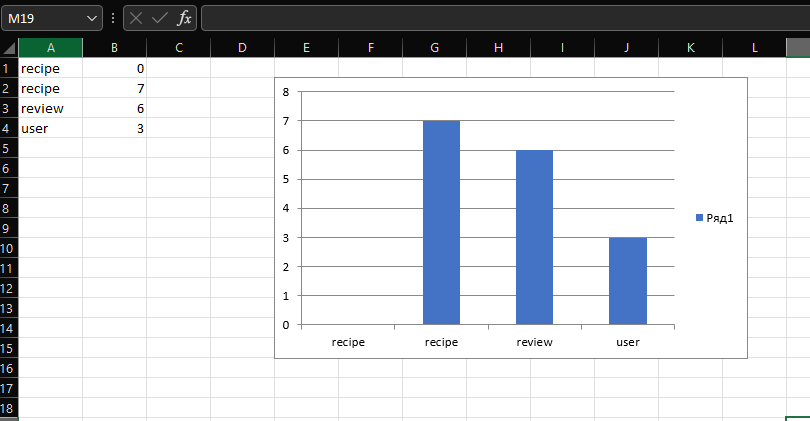